## The IRIS Data

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.


## PCA vs LDA: What's the Difference?
Both PCA and LDA are linear transformation techniques. However, PCA is an unsupervised while LDA is a supervised dimensionality reduction technique.

Unlike PCA, LDA tries to reduce dimensions of the feature set while retaining the information that discriminates output classes. LDA tries to find a decision boundary around each cluster of a class

### Import usual libraries:

In [2]:
#Usual suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

#To ignore Warnings
import warnings
warnings.filterwarnings("ignore")

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

## Get the data

In [50]:
#Get the data
iris = pd.read_csv("iris.data.csv")

Let's visualize the data and get you started!

## Data understanding

***The better we understand about our data ,the better the result will be!!***

In [4]:
#To display top rows
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
#Shape of iris dataset
print ("Number of Observations :",iris.shape[0])
print ("Number of Features/Columns  :",iris.shape[1])

Number of Observations : 149
Number of Features/Columns  : 5


In [8]:
#Checking for any missing values
iris.isna().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64



## Data Analysis



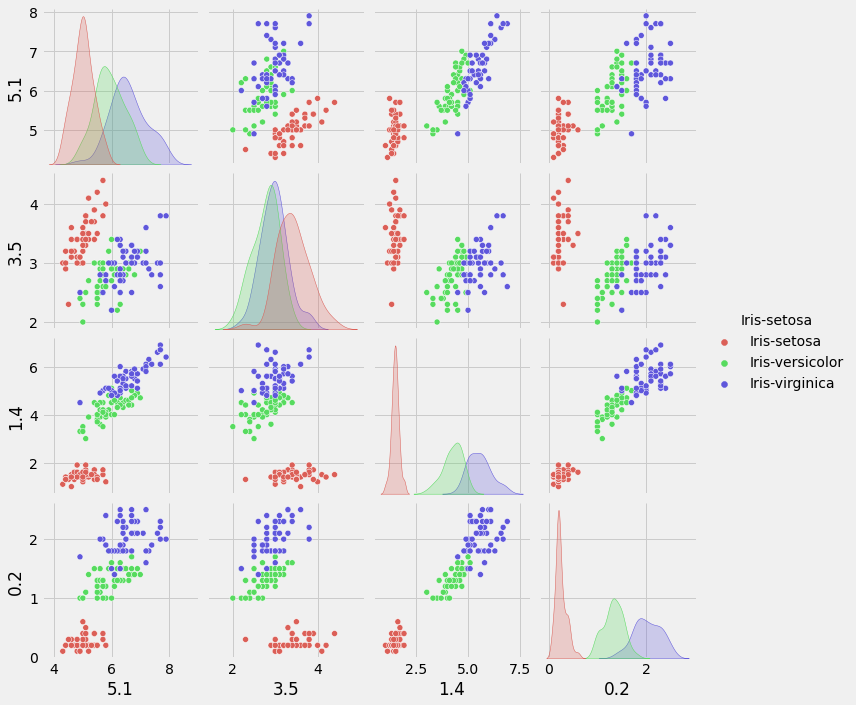

In [31]:
# Visualizing relationship between features :. 
sns.pairplot(iris,hue= iris.columns[4], palette='hls')
plt.show()

## Data Preprocessing

In [35]:
#Import required ML models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

#Standard scaler
from sklearn.preprocessing import StandardScaler

- We will use Lda ,dimensionality reduction technique to reduce no of features 
- LDA is supervised machine learning 

In [36]:
#Separate X and Y varaibles
X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling
As was the case with PCA, we need to perform feature scaling for LDA too.

In [37]:
#Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

### Performing LDA

In [38]:
#Implementing Lda
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

We reduced # of features from 4 to 1..

****Like PCA, we have to pass the value for the **n_components** parameter of the LDA, which refers to the number of linear discriminates that we want to retrieve. In this case we set the** n_components to 1,**** since we first want to check the performance of our classifier with a single linear discriminant. Finally we execute the fit and transform methods to actually retrieve the linear discriminants.****

**Notice, in case of LDA, the transform method takes two parameters: the **X_train** and the **y_train**. However in the case of PCA, the transform method only requires one parameter i.e. X_train. This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants, while PCA doesn't depend upon the output labels.**

In [39]:
#Lets check our dataset shape
print("Training data shape",X_train_lda.shape)

Training data shape (119, 1)


**We can access the following property to obtain the variance explained by each component.**

In [40]:
#Explaned variance ratio
lda.explained_variance_ratio_ * 100

array([98.75229464])

## Training and Making Predictions
Since we want to compare the performance of LDA with one linear discriminant to the performance of PCA with one principal component, we will use the same Random Forest classifier that we used to evaluate performance of PCA-reduced algorithms.

In [41]:
#Random forest classifer
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## Evaluating the Performance
As always, the last step is to evaluate performance of the algorithm with the help of a confusion matrix and find the accuracy of the prediction. 

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12  0  0]
 [ 0 10  0]
 [ 0  3  5]]


Accuracy of test data 0.9


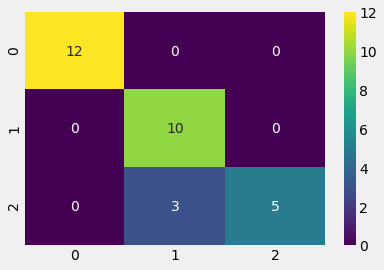

In [43]:
#Seaborn heatmap for confusion matrix
sns.heatmap(cm,cmap='viridis',annot=True);
print('Accuracy of test data' ,accuracy_score(y_test, y_pred))

In [44]:
#Classification report
print(f"classification report :")
print("\n")
print(classification_report(y_test, y_pred))

classification report :


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.77      1.00      0.87        10
 Iris-virginica       1.00      0.62      0.77         8

       accuracy                           0.90        30
      macro avg       0.92      0.88      0.88        30
   weighted avg       0.92      0.90      0.89        30



As we can see, the Random forest classifier correctly classified everything in the test set

***You can see that with one linear discriminant, the algorithm achieved an accuracy of 100%, which is greater than the accuracy achieved with one principal component***

## Performing PCA

*PCA is a technique for feature extraction. So it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all the variables.*

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1).fit(X_train)

#Fitting our model
X_train_pca = pca.transform(X_train)
x_test_pca = pca.transform(X_test)

In [46]:
#Lets check variance
print(f"Pca explained varaince ratio (n_comp=1) :{pca.explained_variance_ratio_ *100}")

Pca explained varaince ratio (n_comp=1) :[72.9075321]


**Looks like LDA is performing better than PCA!!It's evident that after tranforming variables to one LDA explained 99% of the varaiance !!***

Let's Make predictions with pca performed variables

In [47]:
#Make a model with RF
clf2 = RandomForestClassifier(max_depth=2,random_state=42)
clf2.fit(X_train,y_train)
pca_pred = clf2.predict(X_test)

##Lets evaluate our model with confusion matrix

In [48]:
##Confusion Matrix
cm_pca = confusion_matrix(y_test,pca_pred)
print(cm_pca)

[[12  0  0]
 [ 0 10  0]
 [ 0  3  5]]


Accuracy of test data (PCA) 90.0


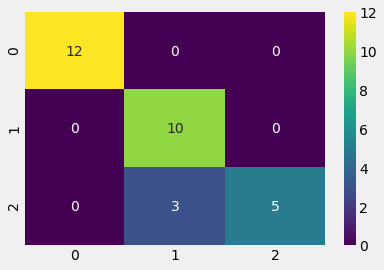

In [49]:
##Let's visualize our CM
sns.heatmap(cm_pca,cmap='viridis',annot=True);
print('Accuracy of test data (PCA)' ,accuracy_score(y_test, pca_pred)*100)

Well,Lda outperformed PCA in this case(BUT not all the scenarios).Please Do upvote if you liked this kernel !!
If you have any doubts or suggestions pls make a comment..

## PCA vs LDA: What to Choose for Dimensionality Reduction?

In case of uniformly distributed data, LDA almost always performs better than PCA. However if the data is highly skewed (irregularly distributed) then it is advised to use PCA since LDA can be biased towards the majority class.

Finally, it is beneficial that PCA can be applied to labeled as well as unlabeled data since it doesn't rely on the output labels. On the other hand, LDA requires output classes for finding linear discriminants and hence requires labeled data